# Celebal Sumer Internship
### TOPIC: Exploratory Data Analysis on Titanic Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(["PassengerId",'Ticket'],axis = 1, inplace = True)

NOTE: Columns such as PassengerId, Name and Ticket number shouldn't be related  to the survival probability. So these columns can be droped.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


NOTE: It indicates that there are total of 891 passesnger details among which 177 people's Age is missing and 687 people's Cabin details are missing. And 2 people's Embarkation details are missing.


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


NOTE: From above data, we conclude- 
1. 38.3% people survived
2. More number of people were actually in 3rd class
3. 50% of passengers were in between the age of 20 to 38

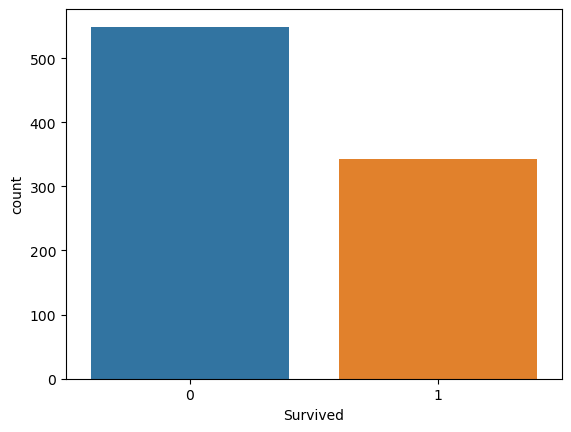

In [7]:
sns.countplot(x='Survived', data=df);

In [8]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

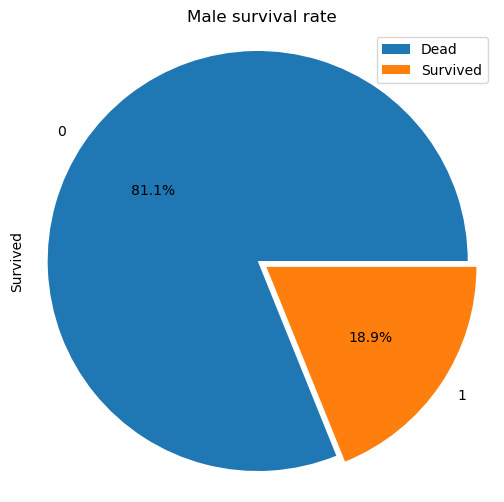

In [9]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Dead","Survived"])
plt.title("Male survival rate")
plt.show()

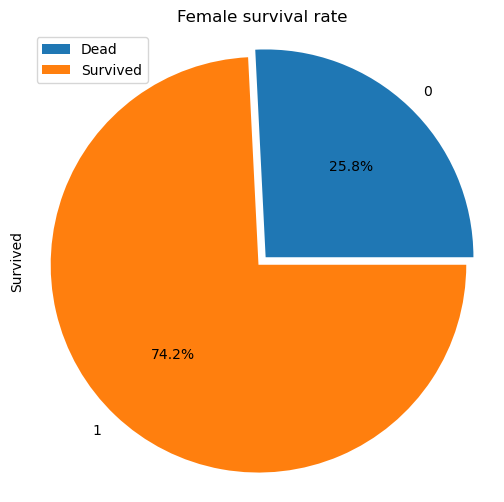

In [10]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Dead","Survived"])
plt.show()

NOTE: The above 2 plots says the females were given more priority than male in the survival process. That too there is a significant difference between the two.

In [11]:
pd.crosstab(df.Pclass, df.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


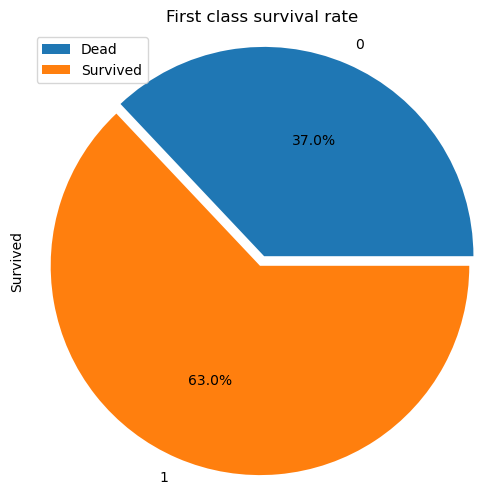

In [12]:
df[df['Pclass'] == 1].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Dead","Survived"])
plt.title("First class survival rate")
plt.show()

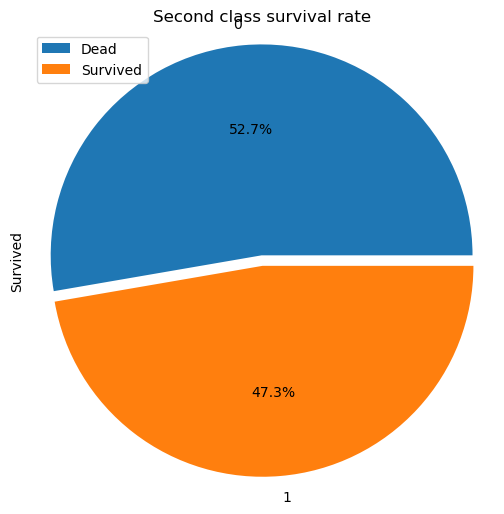

In [13]:
df[df['Pclass'] == 2].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Dead","Survived"])
plt.title("Second class survival rate")
plt.show()

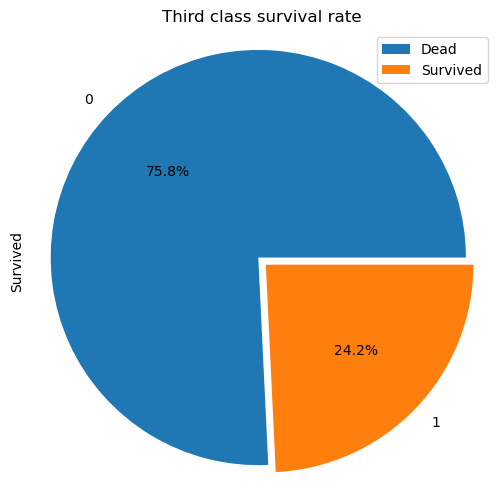

In [14]:
df[df['Pclass'] == 3].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Dead","Survived"])
plt.title("Third class survival rate")
plt.show()

In [15]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

<Axes: xlabel='Pclass', ylabel='Survived'>

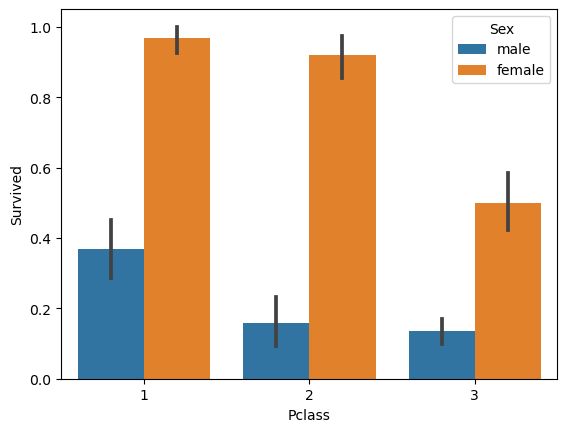

In [16]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=df)

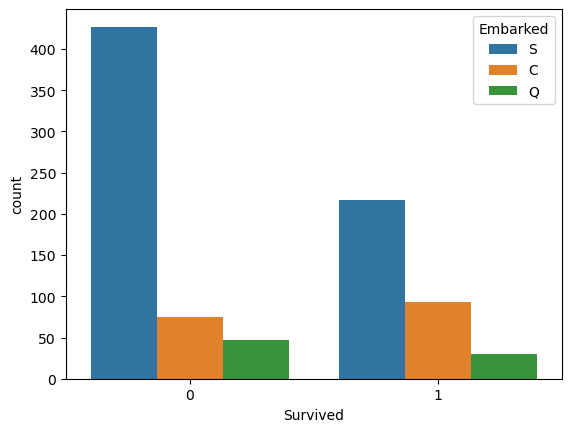

In [17]:
sns.countplot(x='Survived', data=df, hue = 'Embarked');


In [18]:
pd.crosstab([df.Sex, df.Survived], [df.SibSp, df.Pclass], margins=True)

SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

The above crosstab indicates 2 things:
1. Most of the passerenges didn't had siblings onboard and the majority had atmost 1 sibling onboard

2. Not much of priority was given to the passengers who had siblings onboard in the rescue operation

In [19]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

The above crosstab indicates 2 things:

1. Most of the passerenges didn't had parents onboard and the majority had atmost 1 parent onboard
2. Not much of priority was given to the passengers who had parents onboard in the rescue operation

In [20]:
df.corr()

C:\Users\blackbyte\AppData\Local\Temp\ipykernel_15804\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The above correlation table indicated below features:

1. The Age was not a priority in the rescue operation similat to the siblings and parents column as correlation with the target variable is very low
2. There should have been a higher correlation between the Fare and Pclass

In [21]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

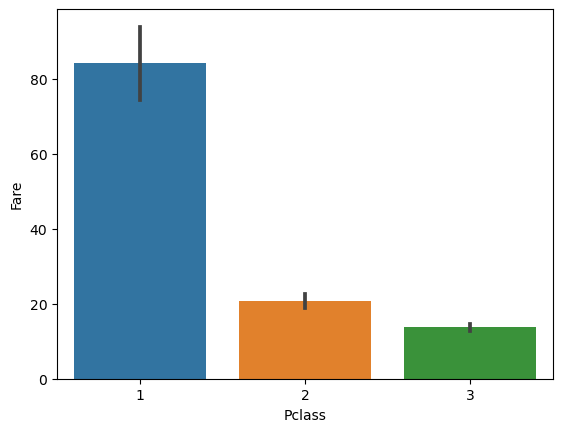

In [22]:
sns.barplot(y = "Fare",x = "Pclass",data = df)

<Axes: xlabel='Pclass', ylabel='Fare'>

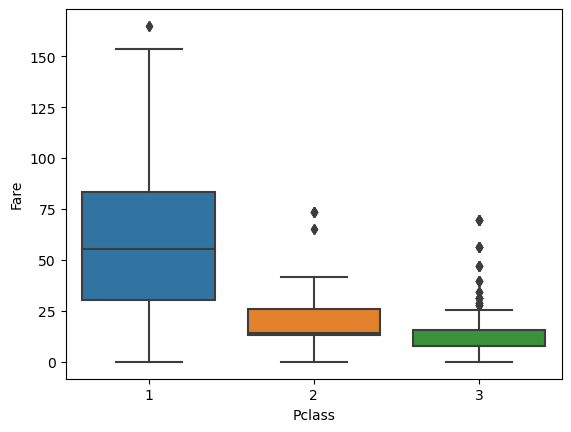

In [23]:
sns.boxplot(y = "Fare",x = "Pclass",data = df[df["Fare"] < 200])

<Axes: xlabel='Pclass', ylabel='Fare'>

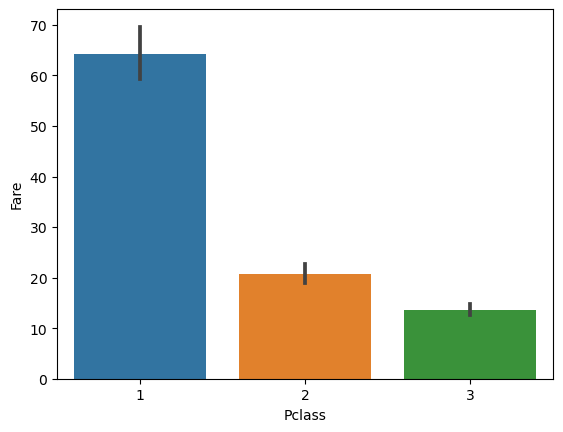

In [24]:
sns.barplot(y = "Fare",x = "Pclass",data = df[df["Fare"] < 200])

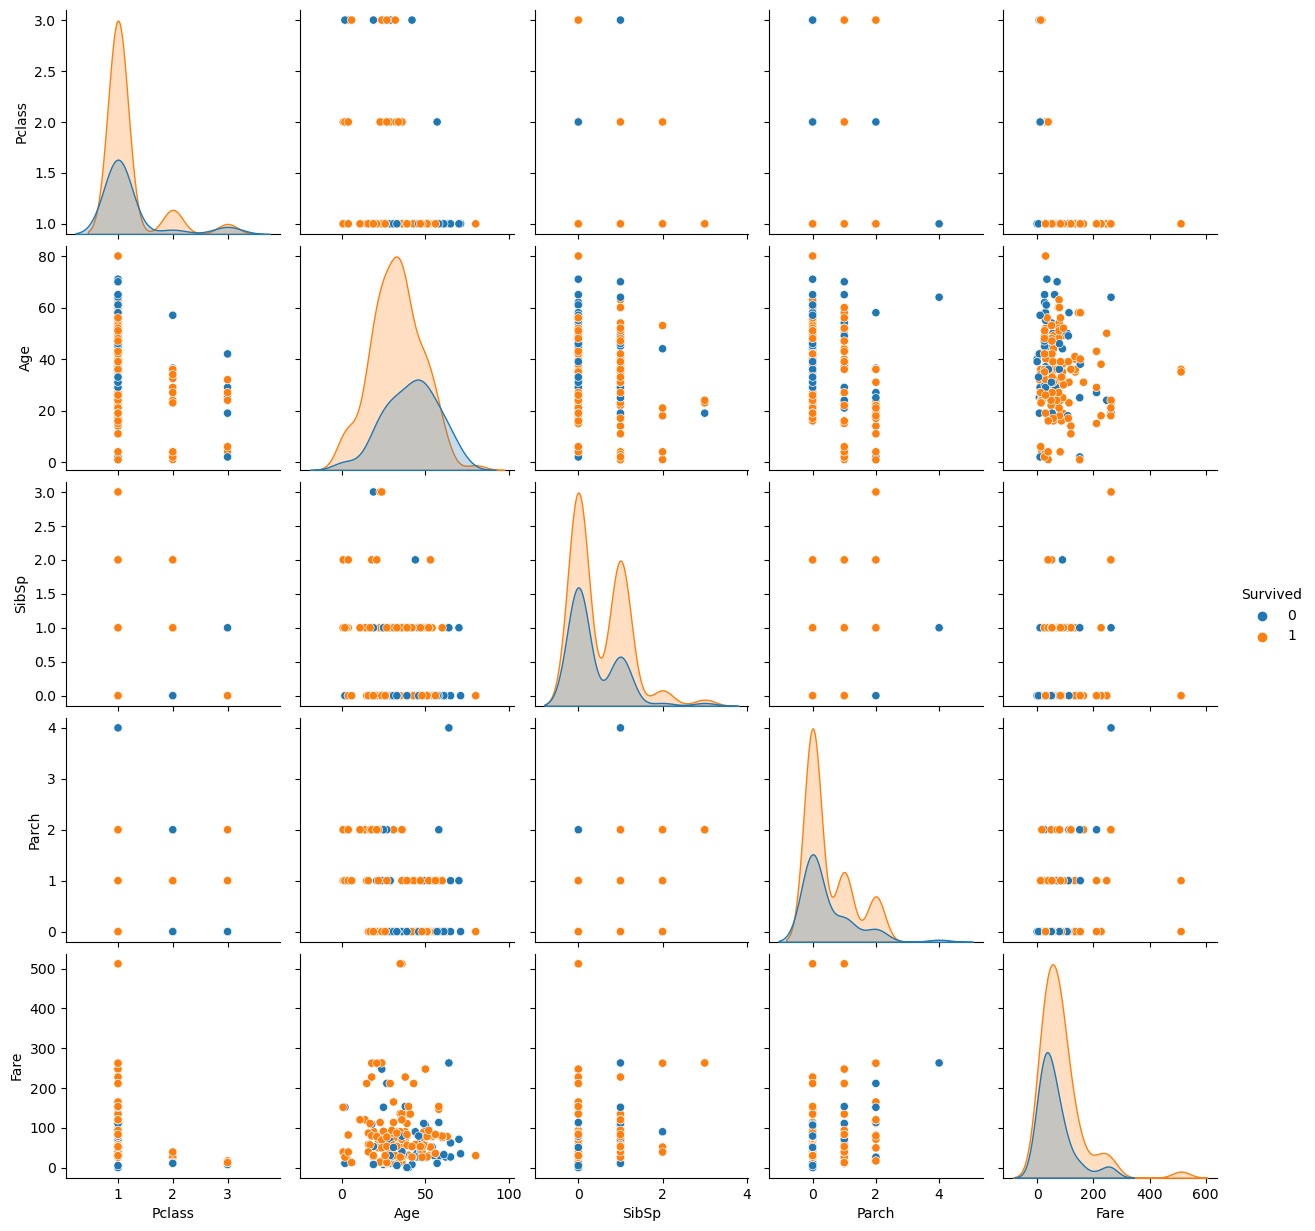

In [25]:
sns.pairplot(df.drop("Name",axis = 1).dropna(),hue = "Survived")

Not much information could be extracted from the correlation table

Now lets see how we can handle the missing values of Age

1. By filling with mean value
i.e, train.fillna(value = df.mean())

2. By filling mean value of corresponding Survived category

In [26]:
df.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


Both values actually look very similar

## Major insights extracted:

1. Females were given higher priority in the rescue operation than male.
2. The first class people were given higher priority than the second class than the third class.
3. The features such as Age, Siblings Onboard and Parents onboard didn't have major influence on the survival probability.